# AUTHOR: LAKSHMI VYSHNAVI UMMADISETTI

# TASK3 - EXPLORATORY DATA ANALYSIS - RETAIL DATASET

# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP - THE SPARKS FOUNDATION (GRIPJANUARY22)

# FINDING WEAK AREAS WHERE MORE PROFIT CAN BE MADE AND FINDING  OTHER PROBLEMS WHILE EXPLORING DATA

In [2]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings as wg
wg.filterwarnings('ignore')

In [3]:
data = pd.read_csv("SampleSuperstore.csv")

In [4]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
data.shape

(9994, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
#To check duplicate values
data.duplicated().sum()

17

In [13]:
#Dropping duplicate values
data.drop_duplicates()
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
data.drop("Postal Code",axis=1)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# EXPLORATORY DATA ANALYSIS

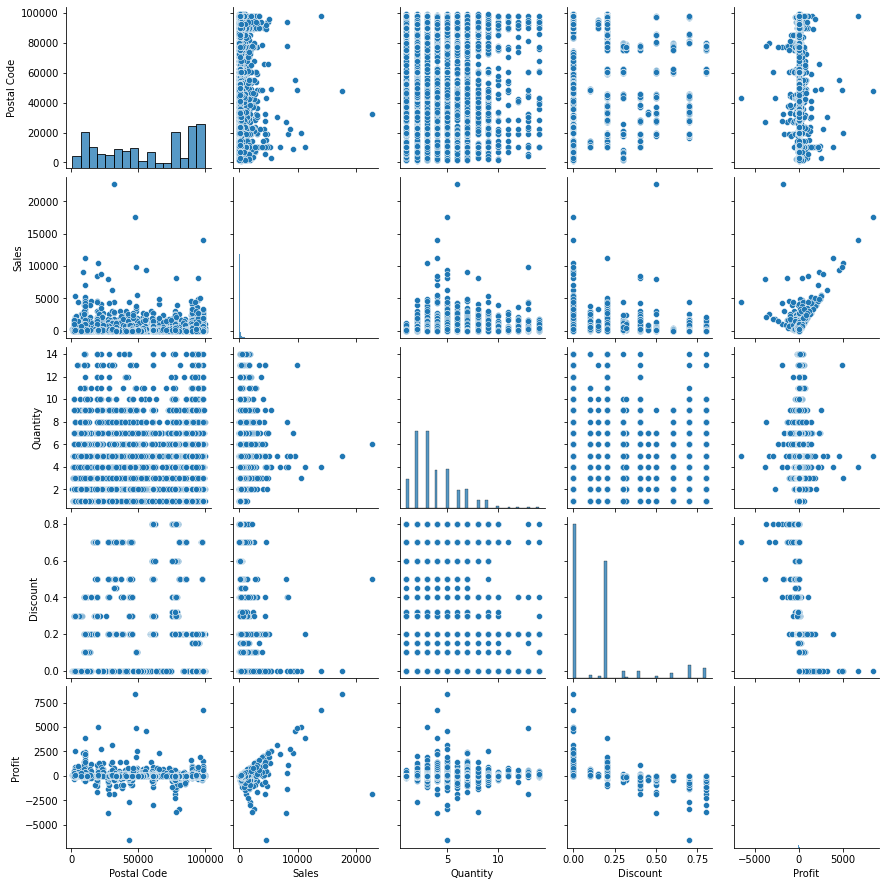

In [15]:
sns.pairplot(data)

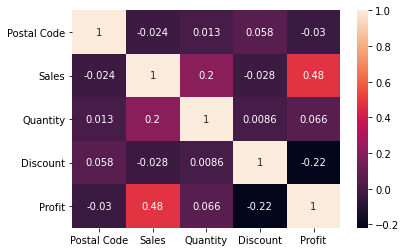

In [16]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [17]:
category_sales_profit = data.groupby('Category').sum()
display(category_sales_profit)

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,118196026,741999.7953,8028,368.89,18451.2728
Office Supplies,330772872,719047.0320,22906,947.80,122490.8008
Technology,102603754,836154.0330,6939,244.40,145454.9481


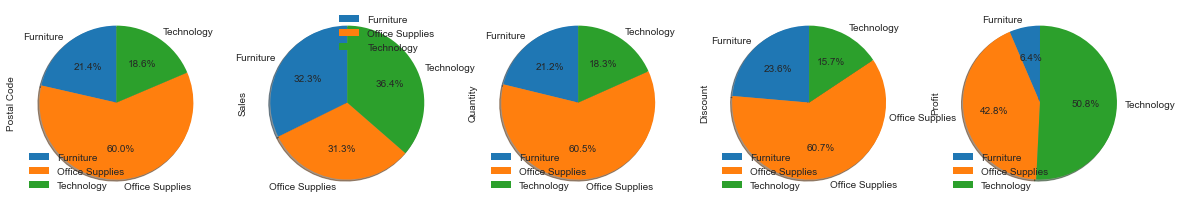

In [18]:
#Sales, Quantity, Discount and Profit of Categories
plt.style.use('seaborn-darkgrid')
category_sales_profit.plot.pie(shadow = True,startangle=90,subplots=True,figsize=(20, 10), autopct='%1.1f%%')
plt.show()

From above :

Total sales % by Technology is 36.4% and profit % is 50.8%

Total sales % by Furniture is 32.3% and profit % is 6.4%

Total sales % by Office Supplies is 31.3% and profit % is 42.7%

In [19]:
Subcategory_sales_profit = data.groupby('Sub-Category').sum()
display(Subcategory_sales_profit)

,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,
Accessories,44468434,167380.3180,2976,60.80,41936.6357
Appliances,25250538,107532.1610,1729,77.60,18138.0054
Art,43329658,27118.7920,3000,59.60,6527.7870
Binders,83626398,203412.7330,5974,567.00,30221.7633
Bookcases,12771539,114879.9963,868,48.14,-3472.5560
Chairs,34936229,328449.1030,2356,105.00,26590.1663
Copiers,3873477,149528.0300,234,11.00,55617.8249
Envelopes,13325731,16476.4020,906,20.40,6964.1767
Fasteners,12506063,3024.2800,914,17.80,949.5182


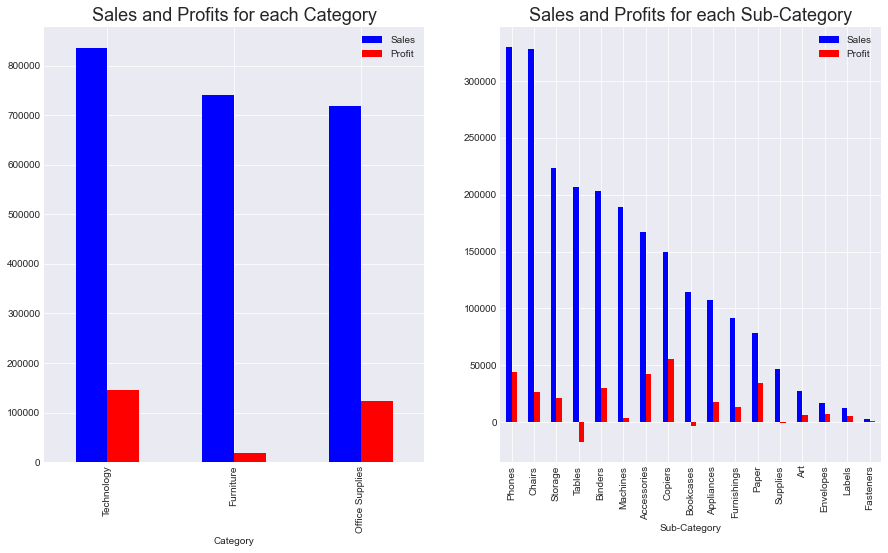

In [20]:
#Sales and Profits of Categories and Sub-Categories
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
data.groupby("Category")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False).plot(kind="bar",color=["blue","red"],ax=ax1)
ax1.set_title("Sales and Profits for each Category",size=18)
data.groupby("Sub-Category")[["Sales","Profit"]].sum().sort_values(by ="Sales",ascending=False).plot(kind ="bar",color=["blue","red"],ax=ax2)
ax2.set_title("Sales and Profits for each Sub-Category",size=18)
plt.show()

From plot 1 :

The maximum profit is for category Technology with sales around 836K and the minimum Profit is for category Furniture with sales around 741K


From plot 2 :

The maximum profit is for subcategory Copies with sales nearly 150K and the profit is negative for sub category Tables with sales nearly 206K

In [21]:
Quantity_sales_profit = data.groupby('Quantity').sum()
display(Quantity_sales_profit)

,Postal Code,Sales,Discount,Profit
Quantity,,,,
1,48312855,53251.9345,137.51,7440.4801
2,132436733,289091.4798,371.97,38448.4088
3,132312519,422060.6007,369.37,57015.5250
4,65341216,323670.9944,187.83,44223.3908
5,69734675,415661.6965,193.29,49516.5945
6,31489633,207122.3214,95.27,10325.4678
7,33768539,239908.3659,98.16,34286.9730
8,14569939,117760.1760,44.10,10856.7960
9,14121993,128505.5901,38.17,17687.8908


In [22]:
Segment_sales_profit=data.groupby('Segment').sum()
display(Segment_sales_profit)

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


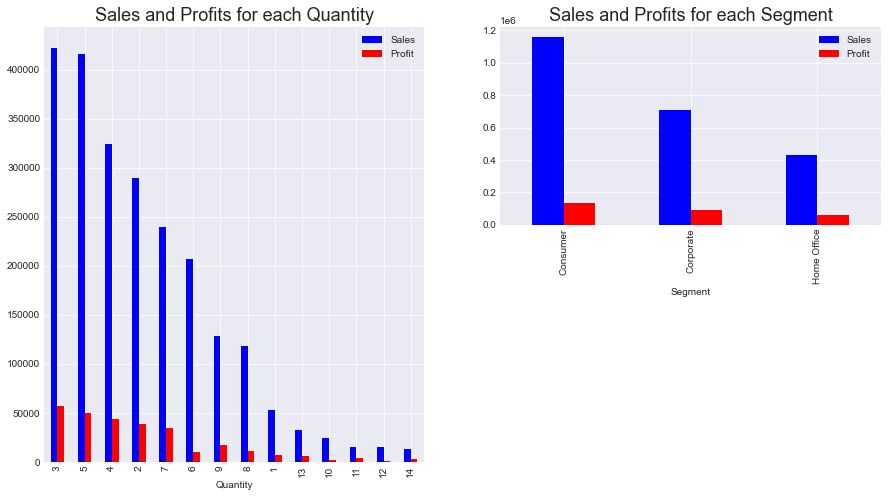

In [23]:
#Sales and Profits of each Quantity and each Segment
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(222)
data.groupby("Quantity")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["blue", "red"],ax=ax1)
ax1.set_title("Sales and Profits for each Quantity",size=18)
data.groupby("Segment")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["blue", "red"],ax=ax2)
ax2.set_title("Sales and Profits for each Segment",size=18)
plt.show()

From plot 1 :

The sales is maximum for lesser quantities and so is the profit.

From plot 2 :

The maximum profit is for Segment consumer for maximum sales and the profit is minimum for segment Home office with minimum sales amongst the segment.

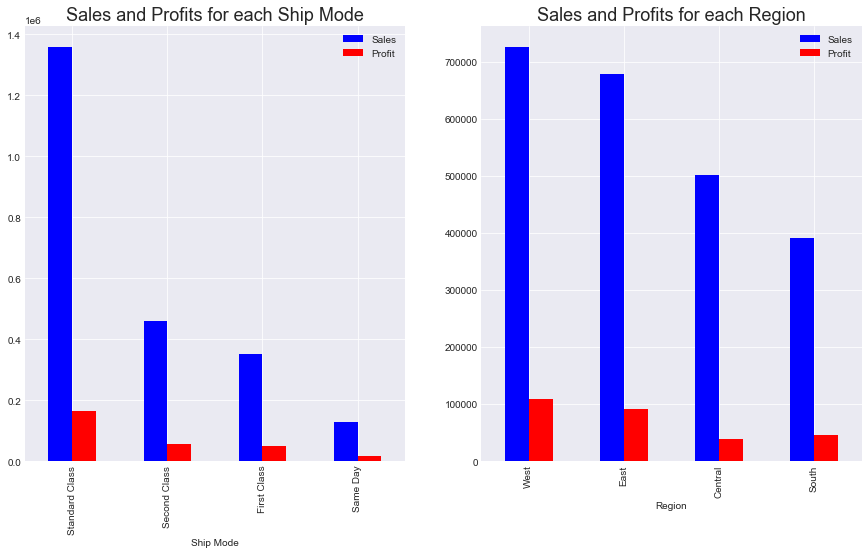

In [24]:
#Sales and Profits of each Ship Mode and each Region
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
data.groupby("Ship Mode")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["blue", "red"],ax=ax1)
ax1.set_title("Sales and Profits for each Ship Mode",size=18)
data.groupby("Region")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["blue", "red"],ax=ax2)
ax2.set_title("Sales and Profits for each Region",size=18)
plt.show()

From plot 1 :

The maximum sales is using the standard class Ship mode giving maximum profits.


From plot 2 :

The maximum sales is more than 700K for the West region and Profit is maximum in this region. The minimum profit is present in the Cdentral region where sales is comparatively higher than the south region that has more profit that the central region.

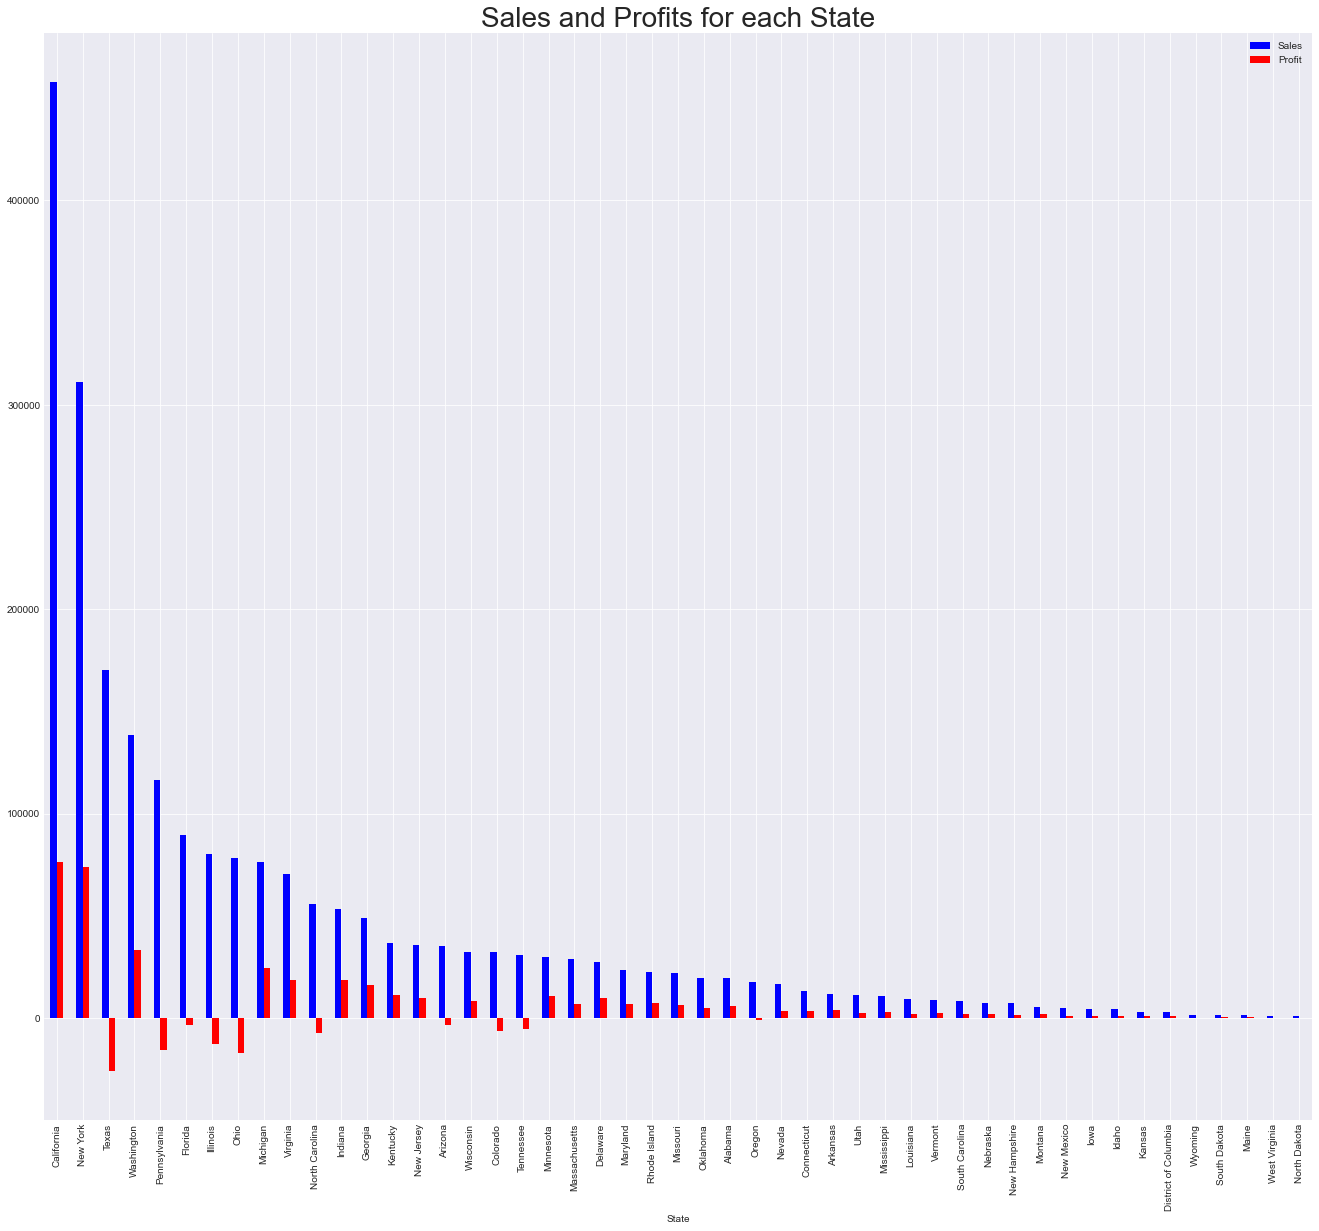

In [25]:
#Sales and Profits of each State
fig=plt.figure(figsize=(50,20))
ax1=fig.add_subplot(121)
data.groupby("State")[["Sales","Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["blue","red"],ax=ax1)
ax1.set_title("Sales and Profits for each State", size=28)
plt.show()

From above :

for states including Texas,Pennsylvania, Florida, Illinois, Ohio, North Carolina and few other states have high sales with negative profits.

In [27]:
#statewise discount
data.groupby("State").sum()['Discount'].sort_values(ascending = False)

State
Texas                   364.64
Pennsylvania            192.90
Illinois                191.90
Ohio                    152.40
California              145.60
Florida                 114.65
North Carolina           70.60
Arizona                  68.00
New York                 62.40
Colorado                 57.60
Tennessee                53.30
Oregon                   35.80
Washington               32.40
Utah                      3.20
Nevada                    2.40
New Mexico                2.20
Massachusetts             2.10
Michigan                  1.80
Idaho                     1.80
Rhode Island              1.20
Montana                   1.00
Maryland                  0.60
Delaware                  0.60
Connecticut               0.60
New Jersey                0.60
New Hampshire             0.30
West Virginia             0.30
Wyoming                   0.20
Nebraska                  0.00
South Dakota              0.00
Wisconsin                 0.00
Arkansas                  0.00
Di

In [28]:
# data frame of statewise sales,profit,discount
states_data = data.groupby("State")[["Sales","Profit","Discount"]].sum().sort_values(by = "Sales", ascending = False)
states_data.head()

,Sales,Profit,Discount
State,,,
California,457687.6315,76381.3871,145.60
New York,310876.2710,74038.5486,62.40
Texas,170188.0458,-25729.3563,364.64
Washington,138641.2700,33402.6517,32.40
Pennsylvania,116511.9140,-15559.9603,192.90


In [29]:
#Discount with Negative Profit
states_data['Discount'][states_data['Profit'] < 0].sort_values(ascending = True)

State
Oregon             35.80
Tennessee          53.30
Colorado           57.60
Arizona            68.00
North Carolina     70.60
Florida           114.65
Ohio              152.40
Illinois          191.90
Pennsylvania      192.90
Texas             364.64
Name: Discount, dtype: float64

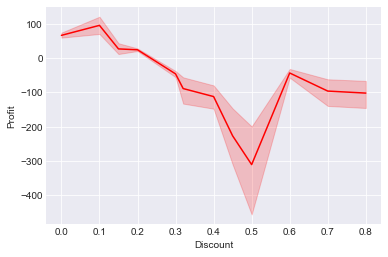

In [31]:
#line plot
sns.lineplot(x = "Discount", y = "Profit", data = data, color = "red")
plt.show()

From above :

We can clearly observe that the discount has a negative relation with Profit i.e. as the discount is increasing the Profit generated is decreased.

In [32]:
# Categorywise sales and profit and their counts
cat_data = data.groupby("Category")[["Sales","Profit"]].sum().sort_values(by = "Sales",ascending = False)
cat_data['value_counts'] = data['Category'].value_counts()
display(cat_data)

,Sales,Profit,value_counts
Category,,,
Technology,836154.0330,145454.9481,1847
Furniture,741999.7953,18451.2728,2121
Office Supplies,719047.0320,122490.8008,6026


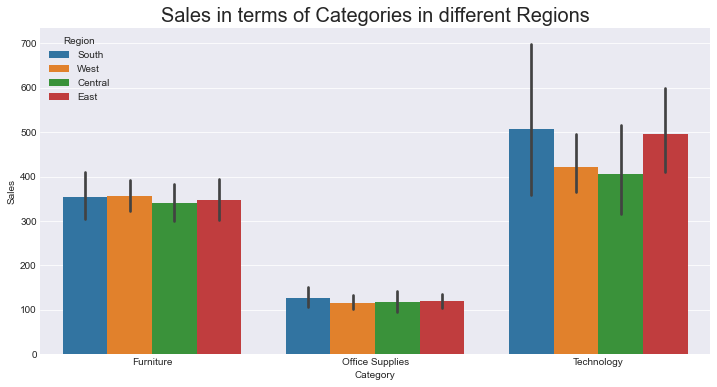

In [33]:
#Sales in terms of Categories in different Regions
plt.figure(figsize=(12,6))
sns.barplot(x='Category',y='Sales',hue='Region',data=data)
plt.title("Sales in terms of Categories in different Regions",size=20)
plt.show()

From Above :

-The sales of "Furniture" is done maximum in Western Region nearly about 360k+,

-after that, the sales of "Office Supplies" is maximum done in South region nearly about 150k+

-and the sales of "Technology" is maximum done in South Region nearly about 550k+.

-Among all the three Category, the sale of Technology is Max and also Maximum Sales is done in South region.

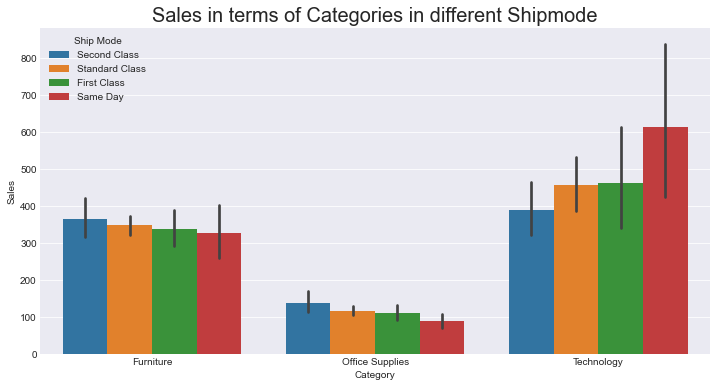

In [34]:
#Sales in terms of Categories in different Shipmode
plt.figure(figsize=(12,6))
sns.barplot(x='Category',y='Sales',hue='Ship Mode',data=data)
plt.title("Sales in terms of Categories in different Shipmode",size=20)
plt.show()

From Above :

-The sales of "Furniture" is done maximum in Second Class,

-after that, the sales of "Office Supplies" is maximum done in Second Class

-and the sales of "Technology" is maximum done in Same Day.

-Among all the three Category, the sale of Technology is Max and also Maximum Sales is done in Same Day.

# Look at data with respect to negative profits

In [35]:
Negative_profits=data.loc[data.Profit <= 0].sort_values(by = "Profit",ascending = True).reset_index(drop=True)
Negative_profits.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.9780
1,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904
2,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
5,First Class,Consumer,United States,Newark,Ohio,43055,East,Technology,Machines,1799.994,2,0.7,-2639.9912
6,First Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Binders,1525.188,6,0.8,-2287.7820
7,Second Class,Consumer,United States,Concord,North Carolina,28027,South,Furniture,Tables,4297.644,13,0.4,-1862.3124
8,Standard Class,Consumer,United States,Houston,Texas,77041,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464
9,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784


In [36]:
#Negative Profit by Category
by_cat=Negative_profits.groupby('Category').sum().reset_index()
by_cat

,Category,Postal Code,Sales,Quantity,Discount,Profit
0,Furniture,44482276,276882.8338,2777,270.04,-60936.1090
1,Office Supplies,50008197,100058.2830,3536,547.40,-56615.2585
2,Technology,13762866,119452.8850,982,90.60,-38579.9182


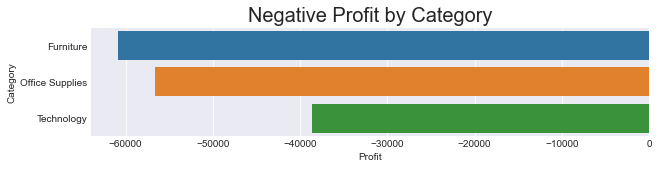

In [37]:
plt.subplots(figsize=(10,2))
sns.barplot(y=by_cat.Category,x=by_cat.Profit)
plt.title("Negative Profit by Category",size=20)
plt.show()

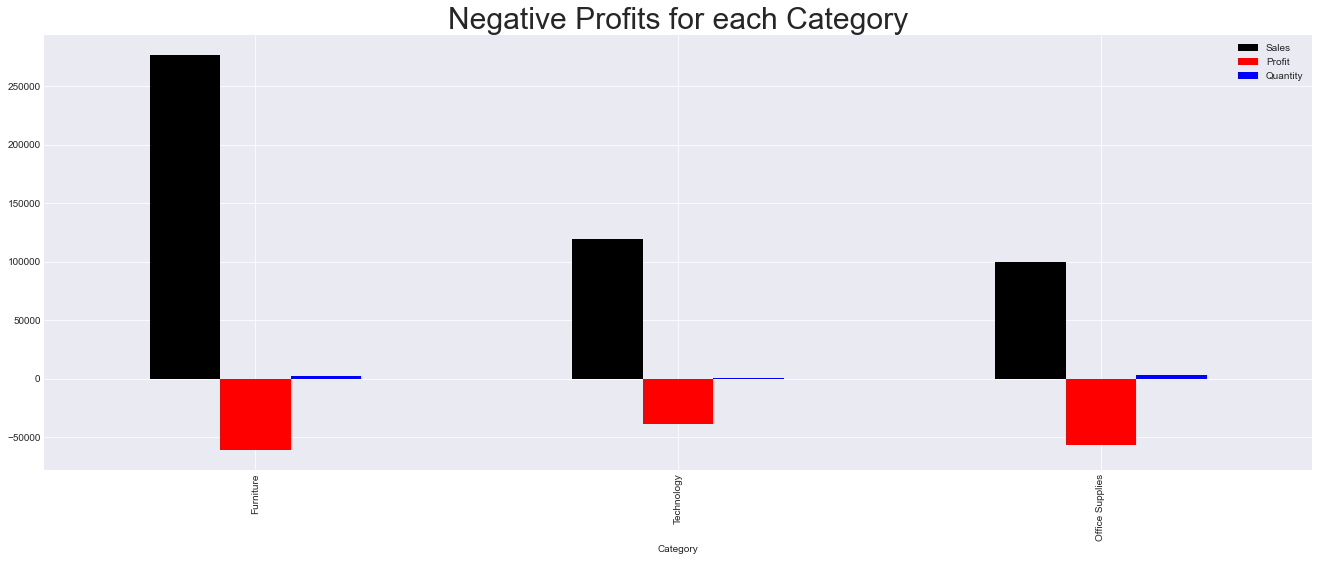

In [38]:
#Negative Profits for each Category
fig=plt.figure(figsize=(50,8))
ax1=fig.add_subplot(121)
Negative_profits.groupby("Category")[["Sales","Profit","Quantity"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black","red","blue"],ax=ax1)
ax1.set_title("Negative Profits for each Category",size=30)
plt.show()

In [39]:
#Negative Profit by City
by_city=Negative_profits.groupby('City').sum().sort_values(by='Profit').reset_index()
by_city.head()

,City,Postal Code,Sales,Quantity,Discount,Profit
0,Philadelphia,4860267,72620.3450,910,116.30,-19590.7411
1,Houston,14410580,38565.3744,691,104.74,-14785.3668
2,Chicago,9518725,20637.1860,550,88.80,-11120.6271
3,San Antonio,2659038,17952.7300,144,17.40,-7831.0254
4,Lancaster,701506,7870.0280,72,9.70,-7632.4946


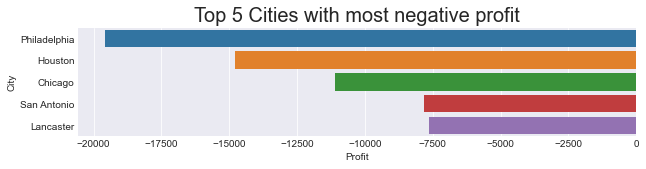

In [40]:
#Top 5 Cities with most negative profit
plt.subplots(figsize=(10,2))
sns.barplot(y=by_city.head().City,x=by_city.head().Profit)
plt.title("Top 5 Cities with most negative profit",size=20)
plt.show()

Insights Drawn from Analysing the SampleSuperstore data 1) The profits for the Category Office Supplies is high, but the sales of the Category Office Supplies is less. So, we should focus on increasing the sales for Office Supplies.

2) The profits for the sub-category Tables and Bookcases are very less but the profit for sub-category Copiers is very high. So, we should focus on increasing the sales of the copiers.

3) The maximum profit is for Segment consumer for maximum sales hence growth must be increased in this segment

4) The ship Mode which is Maximum use by customers are Same day and they are doing maximum sales but do not making any much profit. So we receive maximum profit and sales with Standard class ship mode and hence this mode should be used highly.

5) The maximum sales is more than 700K for the West region and Profit is maximum in this region so we continue to grow the sales in west region. The minimum profit is present in the Central region where sales is comparatively higher than the south region that has more profit that the central region. Hence sales must be increased in south region as compared to central region for maximum profit.

6) States with maximum sales have minimum profits with few giving rise to negative profits, hence more focus should be put on increasing the sales in the states where sales is minimum in the current scenario, to gain more profit.

7) States with maximum sales have minimum profits with few giving rise to negative profits, hence more focus should be put on increasing the sales in the states where sales is minimum in the current scenario, to gain more profit.

8) The states with high Sales are generating less profit due to high discount allowance. Discount is negtively related to the Profit. This is be noted when a discount is being allowed on the products.